## Bank Marketing Campaign

# Import Library

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [17]:
# Import dataset
df = pd.read_excel('bank-additional-full.xlsx')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94767.0,-50.8,1028.0,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94767.0,-50.8,1028.0,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94767.0,-50.8,1028.0,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94767.0,-50.8,1028.0,4963.6,yes


# Data Wrangling

In [18]:
# Function age_range
def umur(x):
    if x <= 20 :
        return '< 21'
    elif x > 20 and x <=30 :
        return '21-30'
    elif x > 30 and x <=40 :
        return '31-40'
    elif x > 40 and x <=50 :
        return '41-50'
    elif x > 50 and x <=60 :
        return '51-60'
    elif x > 60 and x <=70 :
        return '61-70'
    elif x > 70 and x <=80 :
        return '71-80'
    elif x > 80 and x <=90 :
        return '81-90'
    else :
        return '>90'

In [19]:
# Insert Kolom age_year
df.insert(1, column='age_range',value=df['age'].apply(umur))

In [20]:
# Function edu
def edu(x):
    if x == 'basic.4y' :
        return 'basic'
    elif x == 'basic.6y' :
        return 'basic'
    elif x == 'basic.9y' :
        return 'basic'
    else :
        return x

In [21]:
# Insert Kolom edu
df.insert(5, column='edu',value=df['education'].apply(edu))

In [22]:
# Function campaign_range
def campaign_range(x):
    if x <= 10 :
        return '1-10'
    elif x > 10 and x <=20 :
        return '11-20'
    elif x > 20 and x <=30 :
        return '21-30'
    elif x > 30 and x <=40 :
        return '31-40'
    else :
        return '> 40'

In [23]:
# Insert Kolom campaign_range
df.insert(14, column='campaign_range',value=df['campaign'].apply(campaign_range))

In [24]:
# Function filter data 2009
def tahun(x):
    if x == 92843 :
        return '2009'
    elif x == 93074 :
        return '2009'
    elif x == 92893 :
        return '2009'
    elif x == 92963 :
        return '2009'
    elif x == 92469 :
        return '2009'
    elif x == 92201 :
        return '2009'
    elif x == 92379 :
        return '2009'
    elif x == 92431 :
        return '2009'
    elif x == 92649 :
        return '2009'
    elif x == 92731 :
        return '2009'
    else :
        return 'unknown'

In [25]:
# Insert Column Year
df.insert(11, column='year',value=df['cons.price.idx'].apply(tahun))

In [26]:
# Drop baris yang bukan tahun 2009
df=df.drop(df[df['year']!='2009'].index)
df

,age,age_range,job,marital,education,edu,default,housing,loan,contact,...,campaign_range,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27690,26,21-30,student,single,basic.9y,basic,no,yes,no,cellular,...,1-10,999,0,nonexistent,-1.8,92843.0,-50.0,1811.000,5099.1,yes
27691,38,31-40,admin.,single,university.degree,university.degree,no,yes,no,cellular,...,1-10,999,0,nonexistent,-1.8,92843.0,-50.0,1811.000,5099.1,yes
27692,26,21-30,student,single,basic.9y,basic,no,no,no,cellular,...,1-10,999,0,nonexistent,-1.8,92843.0,-50.0,1811.000,5099.1,no
27693,26,21-30,student,single,basic.9y,basic,no,yes,no,telephone,...,1-10,999,0,nonexistent,-1.8,92843.0,-50.0,1811.000,5099.1,no
27694,30,21-30,management,married,university.degree,university.degree,no,yes,no,telephone,...,1-10,999,0,nonexistent,-1.8,92843.0,-50.0,1811.000,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38953,81,81-90,housemaid,divorced,basic.4y,basic,no,yes,no,cellular,...,1-10,999,0,nonexistent,-3.4,92649.0,-30.1,0.719,5017.5,no
38954,62,61-70,blue-collar,married,basic.4y,basic,no,no,no,cellular,...,1-10,999,1,failure,-3.4,92649.0,-30.1,0.719,5017.5,no
38955,62,61-70,blue-collar,married,basic.4y,basic,no,yes,yes,cellular,...,1-10,999,0,nonexistent,-3.4,92649.0,-30.1,0.719,5017.5,no
38956,31,31-40,blue-collar,married,basic.6y,basic,no,yes,no,cellular,...,1-10,999,2,failure,-3.4,92649.0,-30.1,0.719,5017.5,no


In [27]:
# Drop kolom yang tidak terpakai
df = df.drop(columns=['default','day_of_week','duration','pdays','emp.var.rate','nr.employed','euribor3m'])


In [28]:
# Function filter column marital
def fill_marital(x):
    if x == 'unknown' :
        return 'married'
    else:
        return x

In [29]:
# Filter missing value column marital
df['marital'] = df['marital'].apply(fill_marital)

In [30]:
# Function filter column Job
def fill_job(x):
    if x == 'unknown' :
        return 'admin.'
    else:
        return x

In [31]:
# Filter missing value column job
df['job'] = df['job'].apply(fill_job)

In [32]:
# Function filter column Education
def fill_education(x):
    if x == 'unknown' :
        return 'university.degree'
    else:
        return x

In [33]:
# Filter missing value column education
df['edu'] = df['edu'].apply(fill_education)

In [34]:
# Melakukan Fill missing value pada kolom housing
def fill_housing(x):
    if x == 'unknown' :
        return 'yes'
    else:
        return x

In [35]:
# Filter missing value column housing
df['housing'] = df['housing'].apply(fill_housing)

In [36]:
# Melakukan Fill missing value pada kolom loan
def fill_loan(x):
    if x == 'unknown' :
        return 'no'
    else:
        return x

In [37]:
# Filter missing value column loan
df['loan'] = df['loan'].apply(fill_loan)

# **EDA**

## BUSINESS QUESTION 1 
#### Apakah ketika nasabah sering dihubungi jadi lebih tertarik untuk melakukan deposit atau tidak?

In [38]:
# Hasil tabular
pd.crosstab(index=df['campaign_range'], columns=df['y'], margins=True)

y,no,yes,All
campaign_range,,,
1-10,7073,1697,8770
11-20,38,1,39
21-30,1,0,1
All,7112,1698,8810


In [39]:
(pd.crosstab(index=df['campaign_range'], columns=df['y'],normalize='index', margins=True)*100).round(2)

y,no,yes
campaign_range,,
1-10,80.65,19.35
11-20,97.44,2.56
21-30,100.00,0.00
All,80.73,19.27


In [40]:
# INSIGHT :
"""Kebanyakan customer sudah menentukan ingin melakukan deposit sebelum 11x dihubungi. 
Campaign yang terlalu sering atau agresif dapat membuat nasabah tidak tertarik dan bingung ( Source : https://hbr.org/2012/05/to-keep-your-customers-keep-it-simple).
sehingga setelah lebih dari 10x dihubungi dan jika belum ada tanggapan dari nasabah, tim sales dapat mencari calon nasabah lain untuk dihubungi """



'Kebanyakan customer sudah menentukan ingin melakukan deposit sebelum 11x dihubungi. \nCampaign yang terlalu sering atau agresif dapat membuat nasabah tidak tertarik dan bingung ( Source : https://hbr.org/2012/05/to-keep-your-customers-keep-it-simple).\nsehingga setelah lebih dari 10x dihubungi dan jika belum ada tanggapan dari nasabah, tim sales dapat mencari calon nasabah lain untuk dihubungi '

In [41]:
# Saran :
""" Karena peluang dihubungi 1-10 dan menjawab yes sebesar 19.35% ,maka tiap nasabah yang dihubungi 1-10 kali 
dapat meningkatkan nasabah yang ingin melakukan deposito menjadi 1.705 orang atau meningkat 0.1% """

' karena peluang dihubungi 1-10 dan menjawab yes sebesar 19.35% ,maka tiap nasabah yang dihubungi 1-10 kali \ndapat meningkatkan nasabah yang ingin melakukan deposito menjadi 1.705 orang atau meningkat 0.1% '

## BUSINESS QUESTION 2 
#### Manakah yang lebih efektif saat menelefon nasabah, menggunakan celullar atau telephone? (INI BAHASANYA GIMANA?)


In [42]:
# Hasil Tabular
(pd.crosstab(index=df['contact'], columns=df['y'], normalize='columns')*100).round(2)

y,no,yes
contact,,
cellular,90.85,93.99
telephone,9.15,6.01


In [43]:
# INSIGHT :
"""Lebih banyak orang yang mau untuk melakukan deposito saat dihubungi melalui cellular yaitu 94% dari seluruh orang yang setuju melakukan deposito. 
Hal ini terjadi karena sekitar 1/3 dari penduduk portugal menggunakan cellular dalam berkomunikasi pada saat itu
(http://www.websm.org/db/12/13088/Bibliography/The%20Mobile-only%20Population%20in%20Portugal%20and%20Its%20Impact%20in%20a%20Dual%20Frame%20Telephone%20Survey/?&cat=145&p1=1123&p2=82&p3=85&p4=88&p5=179&id=179&cat=145&page=5)
"""


'Lebih banyak orang yang mau untuk melakukan deposito saat dihubungi melalui cellular yaitu 94% dari seluruh orang yang setuju melakukan deposito. \nHal ini terjadi karena sekitar 1/3 dari penduduk portugal menggunakan cellular dalam berkomunikasi pada saat itu\n(http://www.websm.org/db/12/13088/Bibliography/The%20Mobile-only%20Population%20in%20Portugal%20and%20Its%20Impact%20in%20a%20Dual%20Frame%20Telephone%20Survey/?&cat=145&p1=1123&p2=82&p3=85&p4=88&p5=179&id=179&cat=145&page=5)\n'

In [44]:
# Saran : 
"""Karena deposito merupakan salah satu investasi dalam jumlah yang besar, maka tim sales juga dapat mengenalkan produk deposito melalui text message terkait detail produk agar 
nasabah memiliki waktu yang cukup untuk mempelajari produk deposito
(Source : https://www.shopkick.com/partners/blog/understanding-the-types-of-consumer-buying-behavior-and-ways-to-influence-them-slp-fc)

"""

'Karena deposito merupakan salah satu investasi dalam jumlah yang besar, maka tim sales juga dapat mengenalkan produk deposito melalui text message terkait detail produk agar \nnasabah memiliki waktu yang cukup untuk mempelajari produk deposito\n(Source : https://www.shopkick.com/partners/blog/understanding-the-types-of-consumer-buying-behavior-and-ways-to-influence-them-slp-fc)\n\n'

## BUSINESS QUESTION 3
#### Bulan apa yang tepat untuk melakukan campaign?

In [45]:
# Hasil Tabular
pd.crosstab(index=df['month'], columns=df['y'], margins=True).sort_values('yes',ascending=False)


y,no,yes,All
month,,,
All,7112,1698,8810
may,5270,524,5794
aug,506,264,770
jun,451,264,715
oct,267,180,447
nov,189,168,357
mar,156,126,282
sep,161,106,267
jul,112,66,178


In [46]:
(pd.crosstab(index=df['month'] == 'may', columns=df['y'], normalize= 'index', margins=True)*100).round(2)

y,no,yes
month,,
False,61.07,38.93
True,90.96,9.04
All,80.73,19.27


In [47]:
(pd.crosstab(index=df['month'] == 'oct', columns=df['y'], normalize= 'index', margins=True)*100).round(2)

y,no,yes
month,,
False,81.85,18.15
True,59.73,40.27
All,80.73,19.27


In [48]:
df_cci = pd.DataFrame({
    'Month' : ['Maret','May','Juni','Juli','Agustus','September','Oktober','November'],
    'CCI' : [-50,-46.2,-40.8,-33.6,-31.4,-29.8,-26.9,-30.1]
})
df_cci.set_index('Month').sort_values('CCI',ascending = False)

,CCI
Month,
Oktober,-26.9
September,-29.8
November,-30.1
Agustus,-31.4
Juli,-33.6
Juni,-40.8
May,-46.2
Maret,-50.0


In [49]:
# INSIGHT :

"""Nasabah yang paling banyak untuk setuju melakukan deposit terdapat pada bulan Mei. Tetapi pada bulan Mei memiliki persentase keberhasilan 9% dari total yang dihubungi saat itu, 
hal itu terjadi karena rendah nya customer confidence index yang mempengaruhi nasabah untuk mengurangi melakukan deposit (source : https://www.investopedia.com/terms/c/cci.asp ).
"""

'Nasabah yang paling banyak untuk setuju melakukan deposit terdapat pada bulan Mei. Tetapi pada bulan Mei memiliki persentase keberhasilan 9% dari total yang dihubungi saat itu, \nhal itu terjadi karena rendah nya customer confidence index yang mempengaruhi nasabah untuk mengurangi melakukan deposit (source : https://www.investopedia.com/terms/c/cci.asp ).\n'

In [1]:
# Saran : 
"""Saran : Meningkatkan jumlah nasabah yang dihubungi pada bulan yang memiliki tingkat consumer confidence index yang tinggi"""

'Saran : Meningkatkan jumlah nasabah yang dihubungi pada bulan yang memiliki tingkat consumer confidence index yang tinggi'

## BUSINESS QUESTION 4 
#### Apakah umur dapat mempengaruhi nasabah dalam mengambil keputusan deposito?

In [51]:
# Hasil tabular
pd.crosstab(index=df['age_range'], columns=df['y'])

y,no,yes
age_range,,
21-30,1646,444
31-40,3030,578
41-50,1372,246
51-60,747,228
61-70,169,87
71-80,82,67
81-90,28,21
< 21,34,25
>90,4,2


In [52]:
df_umur=pd.DataFrame({
    'age_range':['21-30','31-40','41-50','51-60','61-70','71-80','81-90','<21','>90'],
    'no':[1646,3030,1372,747,169,82,28,34,4],
    'yes':[444,578,246,228,87,67,21,25,2]
})
df_umur

,age_range,no,yes
0,21-30,1646,444
1,31-40,3030,578
2,41-50,1372,246
3,51-60,747,228
4,61-70,169,87
5,71-80,82,67
6,81-90,28,21
7,<21,34,25
8,>90,4,2


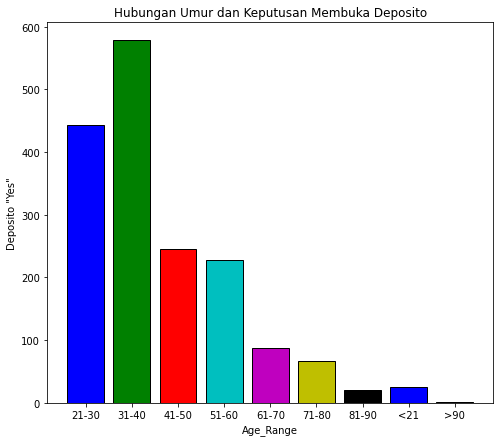

In [53]:
# Hasil Visualisasi
plt.figure(figsize=(8,7))
plt.bar(df_umur['age_range'],df_umur['yes'],
       color = ['b','g','r','c','m','y','k'],
       edgecolor='k',linewidth=1)
plt.xlabel('Age_Range')
plt.ylabel('Deposito "Yes"')
plt.title('Hubungan Umur dan Keputusan Membuka Deposito')
plt.show()

In [54]:
# INSIGHT :
""" Umur mempengaruhi keputusan untuk membuka rekening deposito. Berdasarkan data di atas umur 31-40 dengan total pembukaan rekening deposito sebanyak 578
https://sikapiuangmu.ojk.go.id/FrontEnd/images/FileDownload/88_Proceeding_FGD_Core%20Competencies_Financial_Literacy_for_Adults.compressed.pdf,
usia 31 rata-rata orang mulai berada pada posisi karir yang bagus dan pendapatan bulanan yang stabil sehingga perlu merencanakan keuangannya untuk masa depan salah satunya menambah pendapatan pasif income dari deposito."""

' Umur mempengaruhi keputusan untuk membuka rekening deposito. Berdasarkan data di atas umur 31-40 dengan total pembukaan rekening deposito sebanyak 578\nhttps://sikapiuangmu.ojk.go.id/FrontEnd/images/FileDownload/88_Proceeding_FGD_Core%20Competencies_Financial_Literacy_for_Adults.compressed.pdf,\nusia 31 rata-rata orang mulai berada pada posisi karir yang bagus dan pendapatan bulanan yang stabil sehingga perlu merencanakan keuangannya untuk masa depan salah satunya menambah pendapatan pasif income dari deposito.'

In [3]:
# SARAN : 
"""Marketing Bank dapat melakukan promosi pada calon nasabah pada range umur 31-40 tahun, karena pada umur 31-40 tahun rata-rata 
orang sudah harus mempersiapkan perencanaan keuangan untuk masa depan."""

'Marketing Bank dapat melakukan promosi pada calon nasabah pada range umur 31-40 tahun, karena pada umur 31-40 tahun rata-rata \norang sudah harus mempersiapkan perencanaan keuangan untuk masa depan.'

## BUSINESS QUESTION 5
#### Apakah status pernikahan dapat mempengaruhi nasabah dalam mengambil keputusan deposito?

In [56]:
# Hasil tabular
pd.crosstab(index=df['marital'], columns=df['y'])

y,no,yes
marital,,
divorced,705,148
married,3946,898
single,2461,652


In [ ]:
df_marit=pd.DataFrame({
    'marit': ['divorced','married','single'],
    'no':[4136,22396,9948],
    'yes':[476,2532,1620]
})
df_marit

In [ ]:
# Hasil Visualisasi
plt.figure(figsize=(8,7))
plt.bar(df_marit['marit'],df_marit['yes'],
       color = ['b','g','r'],
       edgecolor='k',linewidth=1)
plt.xlabel('Marital')
plt.ylabel('Deposito "Yes"')
plt.title('Hubungan Status Pernikahan dan Keputusan Membuka Deposito')  
plt.savefig('bussines question nomor 5.png')
plt.show()

In [ ]:
# INSIGHT :
"""Status pernikahan mempengaruhi keputusan dalam investasi deposito, dari analisa di atas ada 2.532 dengan status menikah berada di posisi paling tinggi. Hal ini dikarenakan dalam pernikahan banyak kebutuhan yang harus terpenuhi,
baik keuangan keseharian dan keuangan jangka panjang yang harus disiapkan. seperti yang di jelaskan pada website https://www.truenorthwealth.com/4-financial-considerations-before-getting-married/."""

In [ ]:
# SARAN : 
"""Untuk tim marketing bank dapat melakukan penawaran kembali kepada calon nasabah yang sudah menikah."""

## BUSINESS QUESTION 6
#### Apakah jenjang pendidikan dapat mempengaruhi nasabah dalam mengambil keputusan deposito?

In [57]:
# Hasil Tabular
pd.crosstab(index=df['edu'], columns=df['y'], margins=True).sort_values('yes', ascending=False)

y,no,yes,All
edu,,,
All,7112,1698,8810
university.degree,2199,693,2892
basic,2295,409,2704
high.school,1840,385,2225
professional.course,776,209,985
illiterate,2,2,4


In [60]:
(pd.crosstab(index=df['edu'], columns=df['y'], normalize=True)*100).round(2).sort_values('yes', ascending=False)

y,no,yes
edu,,
university.degree,24.96,7.87
basic,26.05,4.64
high.school,20.89,4.37
professional.course,8.81,2.37
illiterate,0.02,0.02


In [ ]:
# INSIGHT : 
'''Berdasarkan hasil di atas jenjang pendidikan memiliki pengaruh untuk melakukan deposito, yaitu lulusan universitas sebanyak 7.87%. 
Di Portugal orang-orang  yang berpendidikan akan lebih teredukasi terhadap investasi seperti Deposito. 
Namun, hanya 14% penduduk di Portugal yang berpendidikan tinggi. 
Berdasrakan Source : https://www.cmvm.pt/en/Comunicados/Comunicados/Pages/20210525.aspx
'''

In [ ]:
# SARAN : 
''' Tim marketing bank dapat melakukan pemasaran deposito pada calon nasabah yang memiliki latar belakang basic dan SMA yang  menempati urutan kedua dan ketiga  tertinggi setelah lulusan universitas. '''

## BUSINESS QUESTION 7
#### Apakah keberhasilan campaign sebelumnya dapat mempengaruhi nasabah dalam mengambil keputusan deposito?

In [ ]:
# Hasil Tabular
pd.crosstab(index=df['poutcome'], columns='Jumlah')

In [ ]:
# Hasil Tabular
pd.crosstab(index=[df['poutcome'],df['previous']], columns=df['y'], margins=True)

In [ ]:
# INSIGHT
'''Dari hasil analisa,  Tim Marketing berhasil melakukan promosi melalui di telepon sebelumnya dengan total peserta 581 orang. 
Sedangkan, saat ini  berhasil di telepon mau melakukan deposito dengan total peserta deposito 1698 orang dengan 328 orang sudah pernah mengikuti promosi sebelumnya, 1057 orang yang pertama kali dihubungi dan 313 orang yang tidak mengikuti promosi sebelumnya namun tertarik dan melakukan deposit saat ini.

'''

In [ ]:
# SARAN
'''
Untuk tim marketing dapat melakukan campaign kembali pada klien sebelumnya yang “failure” untuk di telepon kembali dan menawarkan kembali deposito dan coba melakukan penawaran deposito juga kepada calon nasabah lainnya. 
Selain itu, jelaskan mengenai deposito yang memiliki resiko yang rendah, karena setelah krisis 2008 masih banyak yang takut untuk berinvestasi. 
Source : https://www.investopedia.com/insights/how-2008-crisis-changed-how-we-save-and-invest/'''

## BUSINESS QUESTION 8
#### Apakah pekerjaan dapat mempengaruhi nasabah dalam mengambil keputusan deposito?

In [63]:
# Hasil Tabular
(pd.crosstab(index=df['job'], columns=df['y'], normalize='columns')*100).round(2).sort_values('yes', ascending=False)

y,no,yes
job,,
admin.,25.98,31.04
technician,13.03,14.96
blue-collar,26.22,12.54
retired,4.47,10.07
management,6.52,7.54
student,3.49,6.95
services,10.43,6.30
unemployed,2.15,3.18
self-employed,3.15,3.06


In [ ]:
# Insight :
'''Berdasarkan hasil di Pekerjaan nasabah tidak memiliki hubungan terhadap keinginan melakukan deposito, karena dari hasil analisa dapat dilihat 3 rating tertinggi melakukan deposito, yaitu : 
1. Admin(31.03%) , 2. teknisi (14.95%) dan 3. Buruh (12.08%). 
'''

In [ ]:
# SARAN :
'''Marketing bank dapat melakukan promosikan lebih banyak deposito ke calon nasabah urutan 1-3 tertinggi seperti Admin, teknisi dan buruh atau dapat juga melakukan ke 4 teratas yaitu retired(pensiunan).
Karena dengan melakukan transaksi deposito yang resikonya rendah serta dapat diambil kapan saja jika dibutuhkan, cocok untuk pensiunan. 
Source : https://www.thebalance.com/are-cds-a-good-investment-for-retirement-income-2388901#:~:text=When%20you%20invest%20money%20for,losing%20all%20of%20your%20cash.
https://www.investopedia.com/insights/how-2008-crisis-changed-how-we-save-and-invest/'''


## BUSINESS QUESTION 9
#### Apakah dengan melakukan deposit melalui digital bank dapat meningkatkan customer? (Jeffrey)

In [ ]:
# Hasil Tabular
(pd.crosstab(index=[df['housing'], df['loan']], columns=df['y'], normalize='columns', margins=True)*100).round(2)

In [ ]:
pd.crosstab(index=[df['housing'], df['loan']], columns=df['y'], margins=True)

In [ ]:
# INSIGHT :
""" Dari tabel di atas dapat dilihat bahwa orang yang tidak memiliki pinjaman (loan) memiliki kecenderungan untuk melakukan deposit sebesar 37,28% untuk yang tidak memiliki cicilan rumah 
dan 46,57% untuk yang memiliki cicilan rumah. Tim sales juga tidak terlalu banyak menghubungi orang yang memiliki pinjaman untuk kebutuhan pribadi"""

In [ ]:
# SARAN :
""" Tim Sales dapat menghubungi nasabah yang memiliki pinjaman dengan credit score yang baik,  hal itu dikarenakan semakin baik credit score nasabah maka semakin besar juga pendapatan nya, 
sehingga nasabah dengan credit score yang baik memiliki kecenderungan untuk melakukan deposit.
(source : https://www.americanexpress.com/en-us/credit-cards/credit-intel/credit-score-by-age-state/ )
 """